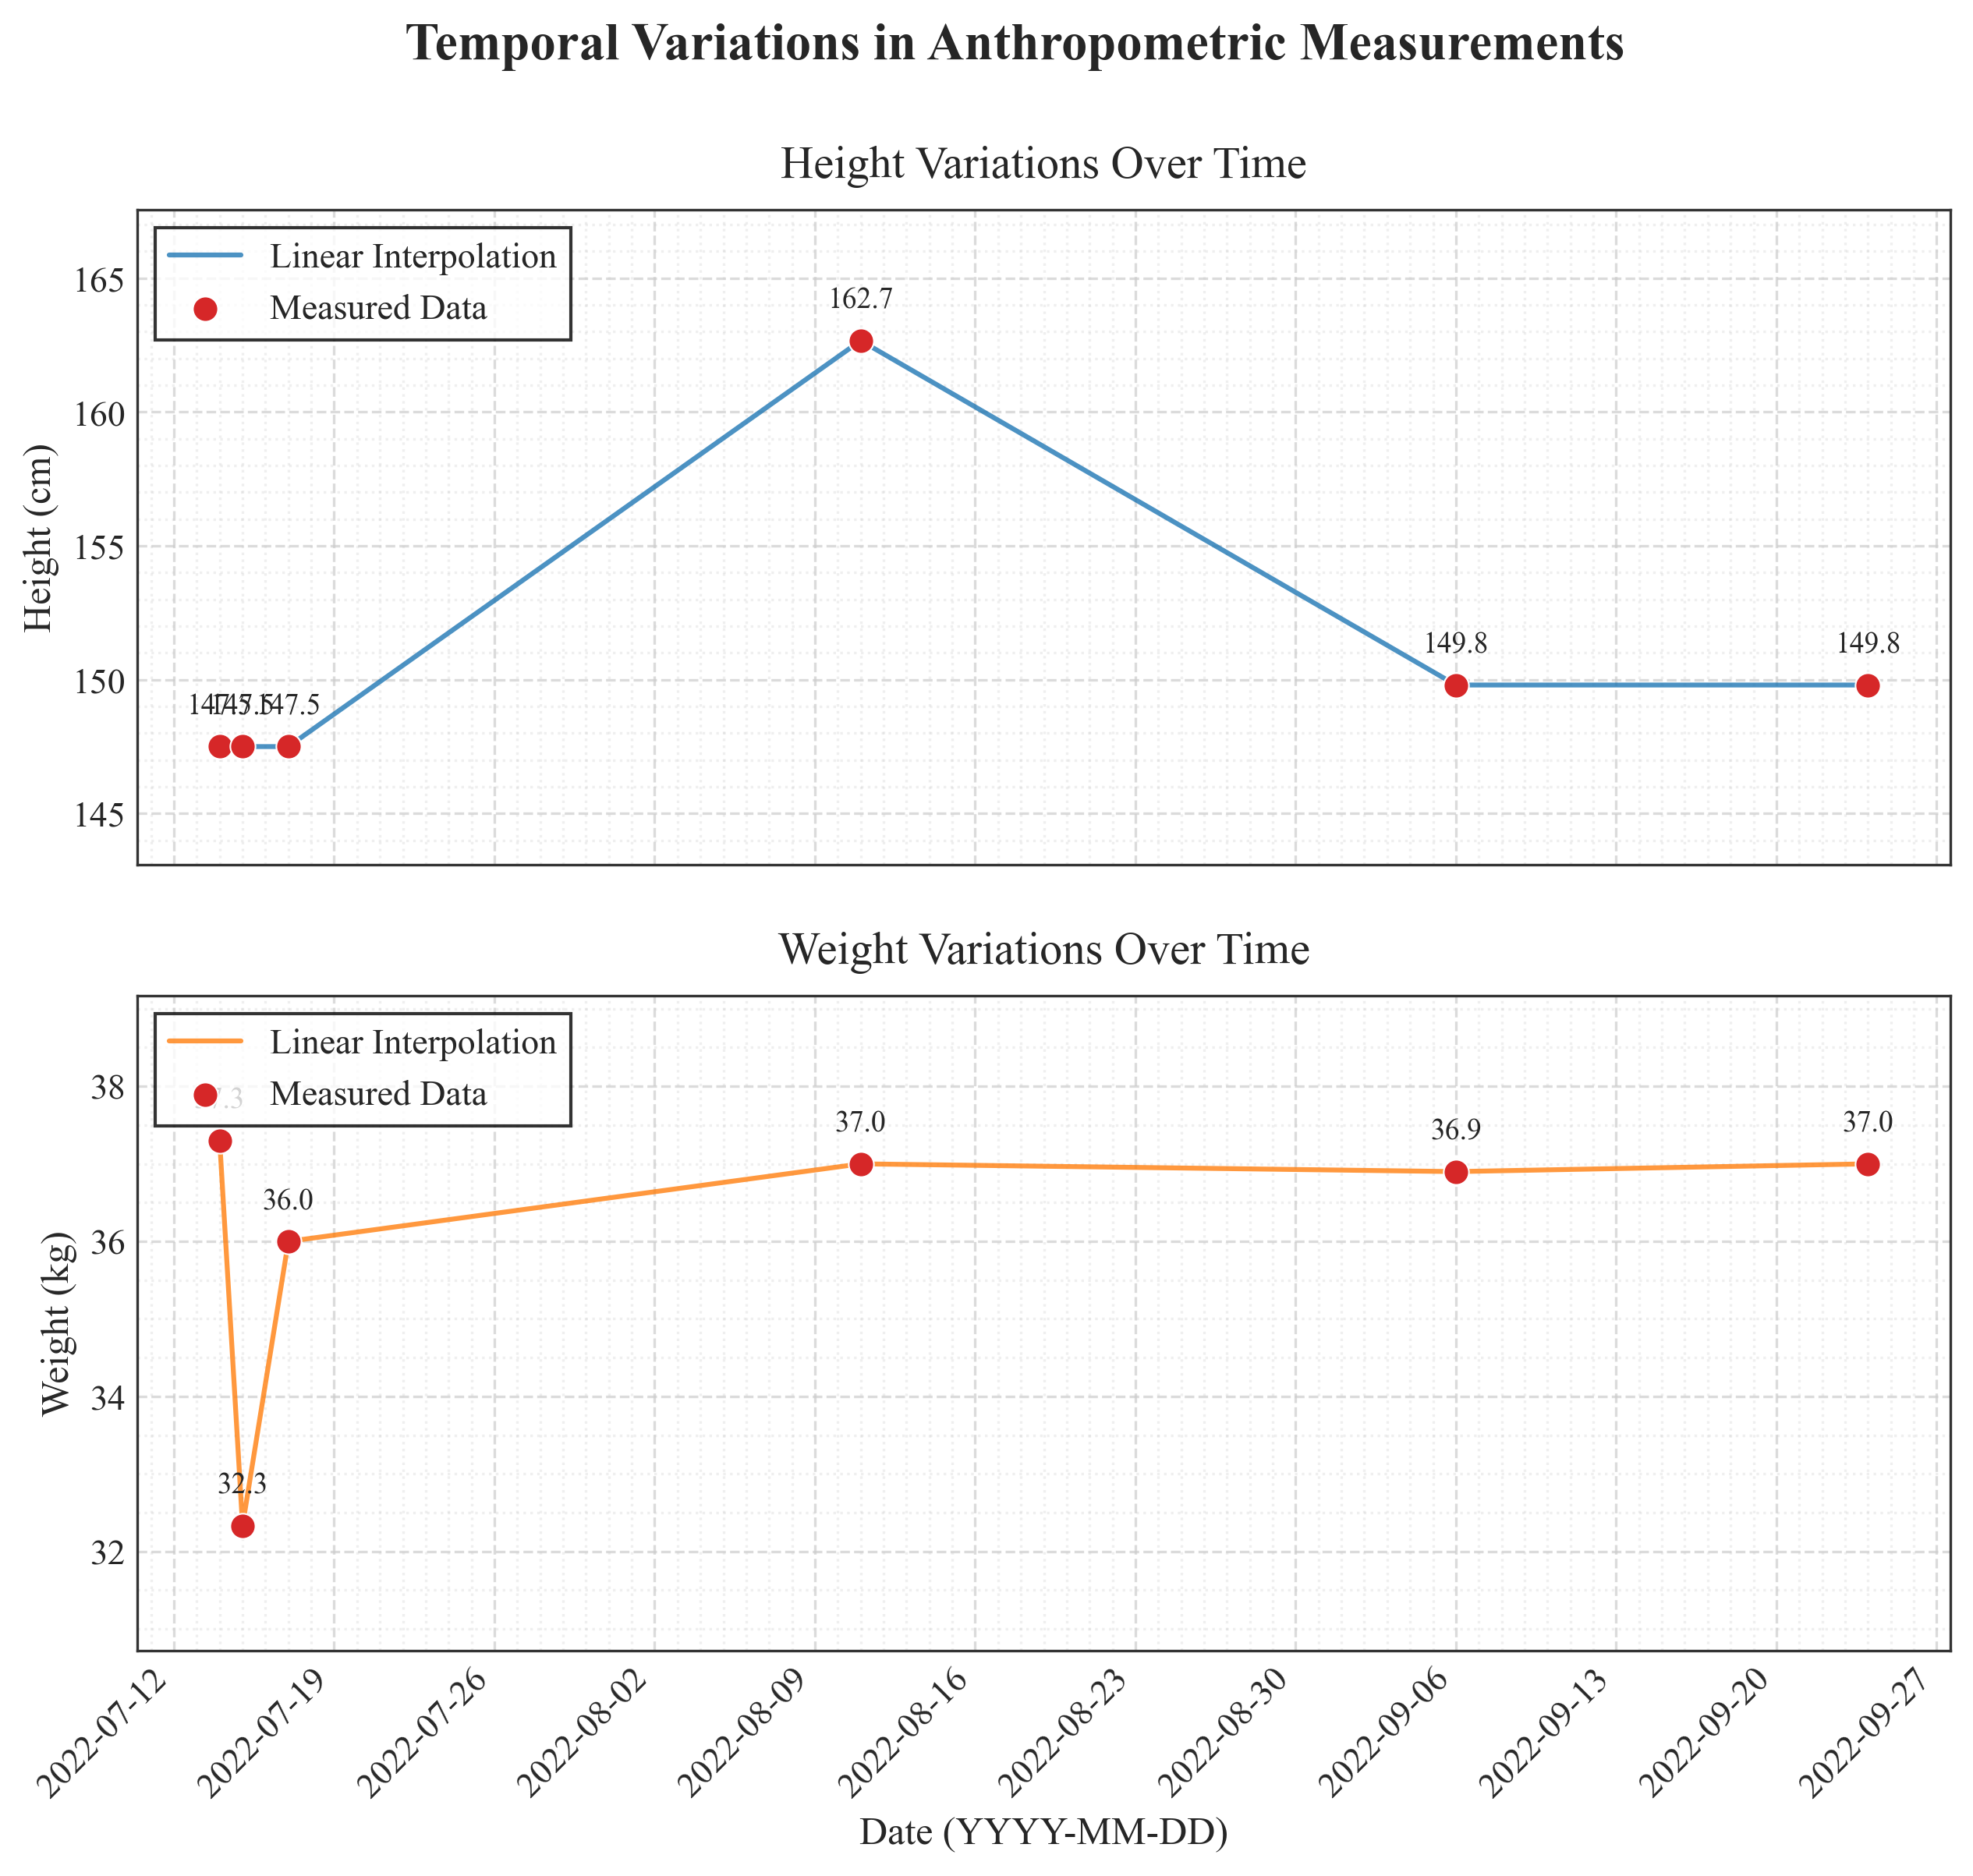


처음 5일 데이터:
      date     height    weight  interpolated
2022-07-14 147.500000 37.300000         False
2022-07-15 147.500000 32.333333         False
2022-07-16 147.500000 34.166667          True
2022-07-17 147.500000 36.000000         False
2022-07-18 148.106667 36.040000          True

마지막 5일 데이터:
      date  height    weight  interpolated
2022-09-20   149.8 36.977778          True
2022-09-21   149.8 36.983333          True
2022-09-22   149.8 36.988889          True
2022-09-23   149.8 36.994444          True
2022-09-24   149.8 37.000000         False

데이터 요약:
전체 데이터 기간: 2022-07-14 ~ 2022-09-24
전체 일수: 73일
실제 측정일: 6일
보간된 일수: 67일


In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import json
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

# 논문 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 11
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.3
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['axes.edgecolor'] = '#333333'
mpl.rcParams['axes.axisbelow'] = True

# 데이터 준비
data_json = '''[{"date":"2022-07-14","height":147.5,"weight":37.3,"interpolated":false},{"date":"2022-07-15","height":147.5,"weight":32.333333333333336,"interpolated":false},{"date":"2022-07-16","height":147.5,"weight":34.16666666666667,"interpolated":true},{"date":"2022-07-17","height":147.5,"weight":36,"interpolated":false},{"date":"2022-07-18","height":148.10666666666665,"weight":36.04,"interpolated":true},{"date":"2022-07-19","height":148.71333333333334,"weight":36.08,"interpolated":true},{"date":"2022-07-20","height":149.32,"weight":36.12,"interpolated":true},{"date":"2022-07-21","height":149.92666666666668,"weight":36.16,"interpolated":true},{"date":"2022-07-22","height":150.53333333333333,"weight":36.2,"interpolated":true},{"date":"2022-07-23","height":151.14,"weight":36.24,"interpolated":true},{"date":"2022-07-24","height":151.74666666666667,"weight":36.28,"interpolated":true},{"date":"2022-07-25","height":152.35333333333332,"weight":36.32,"interpolated":true},{"date":"2022-07-26","height":152.96,"weight":36.36,"interpolated":true},{"date":"2022-07-27","height":153.56666666666666,"weight":36.4,"interpolated":true},{"date":"2022-07-28","height":154.17333333333332,"weight":36.44,"interpolated":true},{"date":"2022-07-29","height":154.78,"weight":36.48,"interpolated":true},{"date":"2022-07-30","height":155.38666666666666,"weight":36.52,"interpolated":true},{"date":"2022-07-31","height":155.99333333333334,"weight":36.56,"interpolated":true},{"date":"2022-08-01","height":156.6,"weight":36.6,"interpolated":true},{"date":"2022-08-02","height":157.20666666666665,"weight":36.64,"interpolated":true},{"date":"2022-08-03","height":157.81333333333333,"weight":36.68,"interpolated":true},{"date":"2022-08-04","height":158.42,"weight":36.72,"interpolated":true},{"date":"2022-08-05","height":159.02666666666667,"weight":36.76,"interpolated":true},{"date":"2022-08-06","height":159.63333333333333,"weight":36.8,"interpolated":true},{"date":"2022-08-07","height":160.23999999999998,"weight":36.84,"interpolated":true},{"date":"2022-08-08","height":160.84666666666666,"weight":36.88,"interpolated":true},{"date":"2022-08-09","height":161.45333333333332,"weight":36.92,"interpolated":true},{"date":"2022-08-10","height":162.06,"weight":36.96,"interpolated":true},{"date":"2022-08-11","height":162.66666666666666,"weight":37,"interpolated":false},{"date":"2022-08-12","height":162.17179487179487,"weight":36.996153846153845,"interpolated":true},{"date":"2022-08-13","height":161.67692307692306,"weight":36.99230769230769,"interpolated":true},{"date":"2022-08-14","height":161.18205128205128,"weight":36.988461538461536,"interpolated":true},{"date":"2022-08-15","height":160.6871794871795,"weight":36.98461538461538,"interpolated":true},{"date":"2022-08-16","height":160.19230769230768,"weight":36.98076923076923,"interpolated":true},{"date":"2022-08-17","height":159.6974358974359,"weight":36.97692307692308,"interpolated":true},{"date":"2022-08-18","height":159.2025641025641,"weight":36.973076923076924,"interpolated":true},{"date":"2022-08-19","height":158.7076923076923,"weight":36.96923076923077,"interpolated":true},{"date":"2022-08-20","height":158.2128205128205,"weight":36.965384615384615,"interpolated":true},{"date":"2022-08-21","height":157.71794871794873,"weight":36.96153846153846,"interpolated":true},{"date":"2022-08-22","height":157.22307692307692,"weight":36.957692307692305,"interpolated":true},{"date":"2022-08-23","height":156.72820512820513,"weight":36.95384615384615,"interpolated":true},{"date":"2022-08-24","height":156.23333333333335,"weight":36.95,"interpolated":true},{"date":"2022-08-25","height":155.73846153846154,"weight":36.94615384615385,"interpolated":true},{"date":"2022-08-26","height":155.24358974358975,"weight":36.94230769230769,"interpolated":true},{"date":"2022-08-27","height":154.74871794871794,"weight":36.93846153846154,"interpolated":true},{"date":"2022-08-28","height":154.25384615384615,"weight":36.934615384615384,"interpolated":true},{"date":"2022-08-29","height":153.75897435897437,"weight":36.93076923076923,"interpolated":true},{"date":"2022-08-30","height":153.26410256410256,"weight":36.926923076923075,"interpolated":true},{"date":"2022-08-31","height":152.76923076923077,"weight":36.92307692307692,"interpolated":true},{"date":"2022-09-01","height":152.274358974359,"weight":36.919230769230765,"interpolated":true},{"date":"2022-09-02","height":151.77948717948718,"weight":36.91538461538462,"interpolated":true},{"date":"2022-09-03","height":151.2846153846154,"weight":36.91153846153846,"interpolated":true},{"date":"2022-09-04","height":150.7897435897436,"weight":36.90769230769231,"interpolated":true},{"date":"2022-09-05","height":150.2948717948718,"weight":36.90384615384615,"interpolated":true},{"date":"2022-09-06","height":149.8,"weight":36.9,"interpolated":false},{"date":"2022-09-07","height":149.8,"weight":36.90555555555555,"interpolated":true},{"date":"2022-09-08","height":149.8,"weight":36.91111111111111,"interpolated":true},{"date":"2022-09-09","height":149.8,"weight":36.916666666666664,"interpolated":true},{"date":"2022-09-10","height":149.8,"weight":36.922222222222224,"interpolated":true},{"date":"2022-09-11","height":149.8,"weight":36.92777777777778,"interpolated":true},{"date":"2022-09-12","height":149.8,"weight":36.93333333333333,"interpolated":true},{"date":"2022-09-13","height":149.8,"weight":36.93888888888889,"interpolated":true},{"date":"2022-09-14","height":149.8,"weight":36.94444444444444,"interpolated":true},{"date":"2022-09-15","height":149.8,"weight":36.95,"interpolated":true},{"date":"2022-09-16","height":149.8,"weight":36.955555555555556,"interpolated":true},{"date":"2022-09-17","height":149.8,"weight":36.96111111111111,"interpolated":true},{"date":"2022-09-18","height":149.8,"weight":36.96666666666667,"interpolated":true},{"date":"2022-09-19","height":149.8,"weight":36.97222222222222,"interpolated":true},{"date":"2022-09-20","height":149.8,"weight":36.977777777777774,"interpolated":true},{"date":"2022-09-21","height":149.8,"weight":36.983333333333334,"interpolated":true},{"date":"2022-09-22","height":149.8,"weight":36.98888888888889,"interpolated":true},{"date":"2022-09-23","height":149.8,"weight":36.99444444444445,"interpolated":true},{"date":"2022-09-24","height":149.8,"weight":37,"interpolated":false}]'''

# JSON 데이터를 파이썬 객체로 변환
data = json.loads(data_json)

# 판다스 데이터프레임으로 변환
df = pd.DataFrame(data)

# 날짜 형식 변환
df['date'] = pd.to_datetime(df['date'])

# 실제 측정값과 보간값 구분
actual_data = df[df['interpolated'] == False]
interpolated_data = df[df['interpolated'] == True]

# 그래프 생성 (논문 스타일)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Temporal Variations in Anthropometric Measurements', fontweight='bold', y=0.98, fontsize=16)

# 색상 설정 - 논문에 적합한 색상
main_color = '#1f77b4'  # 파란색 계열
secondary_color = '#ff7f0e'  # 주황색 계열
marker_color = '#d62728'  # 붉은색 계열

# 1. 키(height) 그래프
ax1.plot(df['date'], df['height'], color=main_color, linestyle='-', 
         linewidth=1.5, label='Linear Interpolation', alpha=0.8)
ax1.scatter(actual_data['date'], actual_data['height'], 
           color=marker_color, s=60, label='Measured Data', 
           zorder=5, edgecolor='white', linewidth=0.5)

# 주요 측정 지점에 강조 표시 (키는 소수점 첫째 자리까지만)
for idx, row in actual_data.iterrows():
    ax1.annotate(f"{row['height']:.1f}", 
                xy=(row['date'], row['height']),
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=9,
                ha='center')

ax1.set_title('Height Variations Over Time', fontsize=14, pad=10)
ax1.set_ylabel('Height (cm)', fontsize=12)
ax1.grid(which='major', linestyle='--', alpha=0.7)
ax1.grid(which='minor', linestyle=':', alpha=0.3)
ax1.legend(loc='upper left', frameon=True, fancybox=False, edgecolor='black', facecolor='white', framealpha=0.8)

# Y축 범위 및 눈금 설정
ax1.set_ylim([min(df['height'])*0.97, max(df['height'])*1.03])
ax1.yaxis.set_major_locator(MultipleLocator(5))
ax1.yaxis.set_minor_locator(MultipleLocator(1))

# 2. 몸무게(weight) 그래프
ax2.plot(df['date'], df['weight'], color=secondary_color, linestyle='-', 
         linewidth=1.5, label='Linear Interpolation', alpha=0.8)
ax2.scatter(actual_data['date'], actual_data['weight'], 
           color=marker_color, s=60, label='Measured Data', 
           zorder=5, edgecolor='white', linewidth=0.5)

# 주요 측정 지점에 강조 표시
for idx, row in actual_data.iterrows():
    ax2.annotate(f"{row['weight']:.1f}", 
                xy=(row['date'], row['weight']),
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=9,
                ha='center')

ax2.set_title('Weight Variations Over Time', fontsize=14, pad=10)
ax2.set_ylabel('Weight (kg)', fontsize=12)
ax2.set_xlabel('Date (YYYY-MM-DD)', fontsize=12)
ax2.grid(which='major', linestyle='--', alpha=0.7)
ax2.grid(which='minor', linestyle=':', alpha=0.3)
ax2.legend(loc='upper left', frameon=True, fancybox=False, edgecolor='black', facecolor='white', framealpha=0.8)

# Y축 범위 및 눈금 설정
y_min = min(df['weight']) * 0.95
y_max = max(df['weight']) * 1.05
ax2.set_ylim([y_min, y_max])
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.5))

# X축 날짜 포맷 설정 (논문 스타일)
date_format = mdates.DateFormatter('%Y-%m-%d')
ax2.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # 1주 간격으로 표시
ax2.xaxis.set_minor_locator(mdates.DayLocator())
plt.xticks(rotation=45, ha='right')  # 날짜 라벨이 겹치지 않도록 회전 및 정렬

# 그래프 저장
plt.savefig('height_weight_visualization.png', dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()

# 일별 데이터 테이블 출력 (처음 5개와 마지막 5개 행만 표시)
print("\n처음 5일 데이터:")
print(df.head().to_string(index=False))

print("\n마지막 5일 데이터:")
print(df.tail().to_string(index=False))

# 요약 정보
print("\n데이터 요약:")
print(f"전체 데이터 기간: {df['date'].min().strftime('%Y-%m-%d')} ~ {df['date'].max().strftime('%Y-%m-%d')}")
print(f"전체 일수: {len(df)}일")
print(f"실제 측정일: {len(actual_data)}일")
print(f"보간된 일수: {len(interpolated_data)}일")



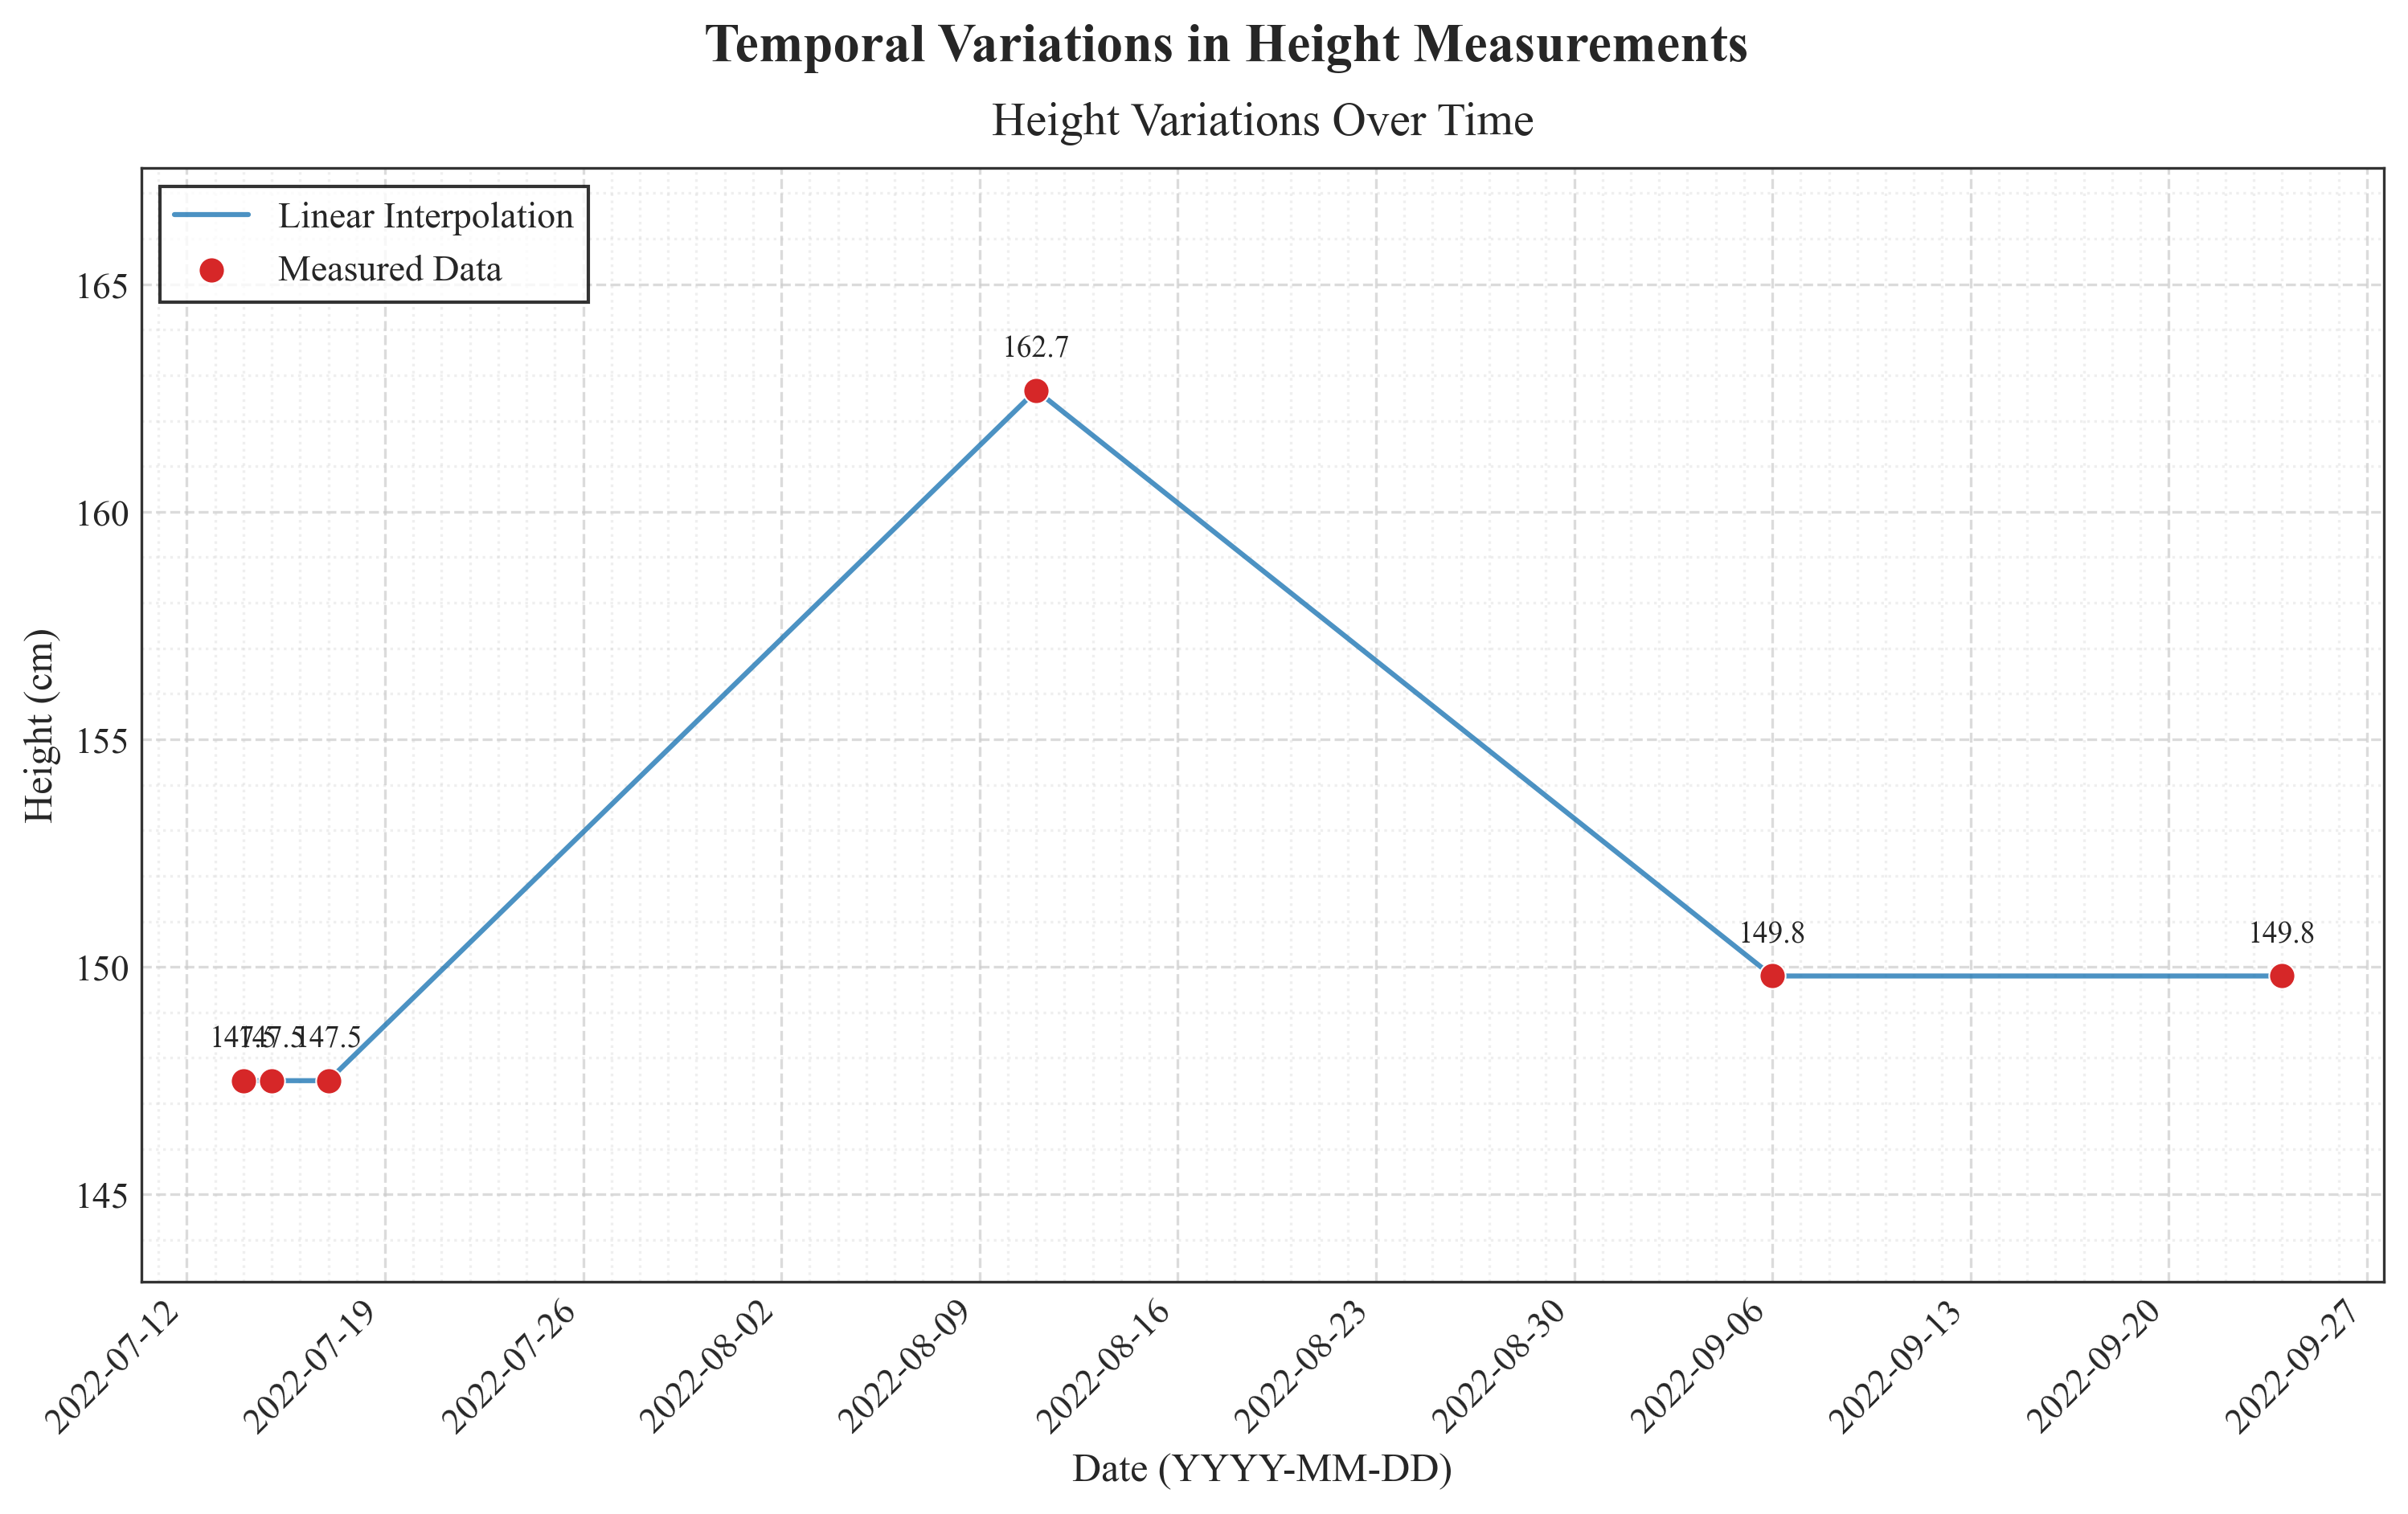


처음 5일 데이터:
      date     height    weight  interpolated
2022-07-14 147.500000 37.300000         False
2022-07-15 147.500000 32.333333         False
2022-07-16 147.500000 34.166667          True
2022-07-17 147.500000 36.000000         False
2022-07-18 148.106667 36.040000          True

마지막 5일 데이터:
      date  height    weight  interpolated
2022-09-20   149.8 36.977778          True
2022-09-21   149.8 36.983333          True
2022-09-22   149.8 36.988889          True
2022-09-23   149.8 36.994444          True
2022-09-24   149.8 37.000000         False

데이터 요약:
전체 데이터 기간: 2022-07-14 ~ 2022-09-24
전체 일수: 73일
실제 측정일: 6일
보간된 일수: 67일

키 통계:
- 최소값: 147.50 cm
- 최대값: 162.67 cm
- 평균값: 153.79 cm
- 중앙값: 152.77 cm


In [13]:

import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import json
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

# 논문 스타일 설정
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11
mpl.rcParams['legend.fontsize'] = 11
mpl.rcParams['figure.figsize'] = (10, 6)  # 한 개 그래프에 맞게 크기 조정
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.3
mpl.rcParams['axes.linewidth'] = 0.8
mpl.rcParams['axes.edgecolor'] = '#333333'
mpl.rcParams['axes.axisbelow'] = True

# 데이터 준비
data_json = '''[{"date":"2022-07-14","height":147.5,"weight":37.3,"interpolated":false},{"date":"2022-07-15","height":147.5,"weight":32.333333333333336,"interpolated":false},{"date":"2022-07-16","height":147.5,"weight":34.16666666666667,"interpolated":true},{"date":"2022-07-17","height":147.5,"weight":36,"interpolated":false},{"date":"2022-07-18","height":148.10666666666665,"weight":36.04,"interpolated":true},{"date":"2022-07-19","height":148.71333333333334,"weight":36.08,"interpolated":true},{"date":"2022-07-20","height":149.32,"weight":36.12,"interpolated":true},{"date":"2022-07-21","height":149.92666666666668,"weight":36.16,"interpolated":true},{"date":"2022-07-22","height":150.53333333333333,"weight":36.2,"interpolated":true},{"date":"2022-07-23","height":151.14,"weight":36.24,"interpolated":true},{"date":"2022-07-24","height":151.74666666666667,"weight":36.28,"interpolated":true},{"date":"2022-07-25","height":152.35333333333332,"weight":36.32,"interpolated":true},{"date":"2022-07-26","height":152.96,"weight":36.36,"interpolated":true},{"date":"2022-07-27","height":153.56666666666666,"weight":36.4,"interpolated":true},{"date":"2022-07-28","height":154.17333333333332,"weight":36.44,"interpolated":true},{"date":"2022-07-29","height":154.78,"weight":36.48,"interpolated":true},{"date":"2022-07-30","height":155.38666666666666,"weight":36.52,"interpolated":true},{"date":"2022-07-31","height":155.99333333333334,"weight":36.56,"interpolated":true},{"date":"2022-08-01","height":156.6,"weight":36.6,"interpolated":true},{"date":"2022-08-02","height":157.20666666666665,"weight":36.64,"interpolated":true},{"date":"2022-08-03","height":157.81333333333333,"weight":36.68,"interpolated":true},{"date":"2022-08-04","height":158.42,"weight":36.72,"interpolated":true},{"date":"2022-08-05","height":159.02666666666667,"weight":36.76,"interpolated":true},{"date":"2022-08-06","height":159.63333333333333,"weight":36.8,"interpolated":true},{"date":"2022-08-07","height":160.23999999999998,"weight":36.84,"interpolated":true},{"date":"2022-08-08","height":160.84666666666666,"weight":36.88,"interpolated":true},{"date":"2022-08-09","height":161.45333333333332,"weight":36.92,"interpolated":true},{"date":"2022-08-10","height":162.06,"weight":36.96,"interpolated":true},{"date":"2022-08-11","height":162.66666666666666,"weight":37,"interpolated":false},{"date":"2022-08-12","height":162.17179487179487,"weight":36.996153846153845,"interpolated":true},{"date":"2022-08-13","height":161.67692307692306,"weight":36.99230769230769,"interpolated":true},{"date":"2022-08-14","height":161.18205128205128,"weight":36.988461538461536,"interpolated":true},{"date":"2022-08-15","height":160.6871794871795,"weight":36.98461538461538,"interpolated":true},{"date":"2022-08-16","height":160.19230769230768,"weight":36.98076923076923,"interpolated":true},{"date":"2022-08-17","height":159.6974358974359,"weight":36.97692307692308,"interpolated":true},{"date":"2022-08-18","height":159.2025641025641,"weight":36.973076923076924,"interpolated":true},{"date":"2022-08-19","height":158.7076923076923,"weight":36.96923076923077,"interpolated":true},{"date":"2022-08-20","height":158.2128205128205,"weight":36.965384615384615,"interpolated":true},{"date":"2022-08-21","height":157.71794871794873,"weight":36.96153846153846,"interpolated":true},{"date":"2022-08-22","height":157.22307692307692,"weight":36.957692307692305,"interpolated":true},{"date":"2022-08-23","height":156.72820512820513,"weight":36.95384615384615,"interpolated":true},{"date":"2022-08-24","height":156.23333333333335,"weight":36.95,"interpolated":true},{"date":"2022-08-25","height":155.73846153846154,"weight":36.94615384615385,"interpolated":true},{"date":"2022-08-26","height":155.24358974358975,"weight":36.94230769230769,"interpolated":true},{"date":"2022-08-27","height":154.74871794871794,"weight":36.93846153846154,"interpolated":true},{"date":"2022-08-28","height":154.25384615384615,"weight":36.934615384615384,"interpolated":true},{"date":"2022-08-29","height":153.75897435897437,"weight":36.93076923076923,"interpolated":true},{"date":"2022-08-30","height":153.26410256410256,"weight":36.926923076923075,"interpolated":true},{"date":"2022-08-31","height":152.76923076923077,"weight":36.92307692307692,"interpolated":true},{"date":"2022-09-01","height":152.274358974359,"weight":36.919230769230765,"interpolated":true},{"date":"2022-09-02","height":151.77948717948718,"weight":36.91538461538462,"interpolated":true},{"date":"2022-09-03","height":151.2846153846154,"weight":36.91153846153846,"interpolated":true},{"date":"2022-09-04","height":150.7897435897436,"weight":36.90769230769231,"interpolated":true},{"date":"2022-09-05","height":150.2948717948718,"weight":36.90384615384615,"interpolated":true},{"date":"2022-09-06","height":149.8,"weight":36.9,"interpolated":false},{"date":"2022-09-07","height":149.8,"weight":36.90555555555555,"interpolated":true},{"date":"2022-09-08","height":149.8,"weight":36.91111111111111,"interpolated":true},{"date":"2022-09-09","height":149.8,"weight":36.916666666666664,"interpolated":true},{"date":"2022-09-10","height":149.8,"weight":36.922222222222224,"interpolated":true},{"date":"2022-09-11","height":149.8,"weight":36.92777777777778,"interpolated":true},{"date":"2022-09-12","height":149.8,"weight":36.93333333333333,"interpolated":true},{"date":"2022-09-13","height":149.8,"weight":36.93888888888889,"interpolated":true},{"date":"2022-09-14","height":149.8,"weight":36.94444444444444,"interpolated":true},{"date":"2022-09-15","height":149.8,"weight":36.95,"interpolated":true},{"date":"2022-09-16","height":149.8,"weight":36.955555555555556,"interpolated":true},{"date":"2022-09-17","height":149.8,"weight":36.96111111111111,"interpolated":true},{"date":"2022-09-18","height":149.8,"weight":36.96666666666667,"interpolated":true},{"date":"2022-09-19","height":149.8,"weight":36.97222222222222,"interpolated":true},{"date":"2022-09-20","height":149.8,"weight":36.977777777777774,"interpolated":true},{"date":"2022-09-21","height":149.8,"weight":36.983333333333334,"interpolated":true},{"date":"2022-09-22","height":149.8,"weight":36.98888888888889,"interpolated":true},{"date":"2022-09-23","height":149.8,"weight":36.99444444444445,"interpolated":true},{"date":"2022-09-24","height":149.8,"weight":37,"interpolated":false}]'''

# JSON 데이터를 파이썬 객체로 변환
data = json.loads(data_json)

# 판다스 데이터프레임으로 변환
df = pd.DataFrame(data)

# 날짜 형식 변환
df['date'] = pd.to_datetime(df['date'])

# 실제 측정값과 보간값 구분
actual_data = df[df['interpolated'] == False]
interpolated_data = df[df['interpolated'] == True]

# 키 그래프만 생성 (몸무게 그래프 제거)
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Temporal Variations in Height Measurements', fontweight='bold', y=0.98, fontsize=16)

# 색상 설정 - 논문에 적합한 색상
main_color = '#1f77b4'  # 파란색 계열
marker_color = '#d62728'  # 붉은색 계열

# 키(height) 그래프
ax.plot(df['date'], df['height'], color=main_color, linestyle='-', 
        linewidth=1.5, label='Linear Interpolation', alpha=0.8)
ax.scatter(actual_data['date'], actual_data['height'], 
          color=marker_color, s=60, label='Measured Data', 
          zorder=5, edgecolor='white', linewidth=0.5)

# 주요 측정 지점에 강조 표시 (키는 소수점 첫째 자리까지만)
for idx, row in actual_data.iterrows():
    ax.annotate(f"{row['height']:.1f}", 
                xy=(row['date'], row['height']),
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=9,
                ha='center')

ax.set_title('Height Variations Over Time', fontsize=14, pad=10)
ax.set_ylabel('Height (cm)', fontsize=12)
ax.set_xlabel('Date (YYYY-MM-DD)', fontsize=12)  # X축 레이블 추가
ax.grid(which='major', linestyle='--', alpha=0.7)
ax.grid(which='minor', linestyle=':', alpha=0.3)
ax.legend(loc='upper left', frameon=True, fancybox=False, edgecolor='black', facecolor='white', framealpha=0.8)

# Y축 범위 및 눈금 설정
ax.set_ylim([min(df['height'])*0.97, max(df['height'])*1.03])
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))

# X축 날짜 포맷 설정 (논문 스타일)
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # 1주 간격으로 표시
ax.xaxis.set_minor_locator(mdates.DayLocator())
plt.xticks(rotation=45, ha='right')  # 날짜 라벨이 겹치지 않도록 회전 및 정렬

# 그래프 저장
plt.savefig('height_weight_visualization.png', dpi=300, bbox_inches='tight')

# 그래프 출력
plt.show()

# 일별 데이터 테이블 출력 (처음 5개와 마지막 5개 행만 표시)
print("\n처음 5일 데이터:")
print(df.head().to_string(index=False))

print("\n마지막 5일 데이터:")
print(df.tail().to_string(index=False))

# 요약 정보
print("\n데이터 요약:")
print(f"전체 데이터 기간: {df['date'].min().strftime('%Y-%m-%d')} ~ {df['date'].max().strftime('%Y-%m-%d')}")
print(f"전체 일수: {len(df)}일")
print(f"실제 측정일: {len(actual_data)}일")
print(f"보간된 일수: {len(interpolated_data)}일")

# 키와 체중의 통계 정보
print("\n키 통계:")
print(f"- 최소값: {df['height'].min():.2f} cm")
print(f"- 최대값: {df['height'].max():.2f} cm")
print(f"- 평균값: {df['height'].mean():.2f} cm")
print(f"- 중앙값: {df['height'].median():.2f} cm")

